# The Gillespie model

The Gillespie model is stochastic process that generalized the replicator model. The replicator model is a deterministic model for the fraction of species $n=1,...,N$ governed by 

$$\dot x_i = (\mu_i-\phi)x_i$$

where the parameters $\mu_i$ are fitnesses of species $i$ and $\phi=\sum _i \mu_i x_i$ is the population mean fitness and the population is normalized to unity, i.e. $\sum x_i=1$ because the $x_i$ are fractions of the entire population.

The Gillespie model is a stochastic model defined by

$$x_i(t)=\frac {n_i(t)}{\sum _j n_j(t)}$$

where the components $n_i(t)$ are geometric Brownian motion processes, so solutions to

$$dn_i=(\mu_i dt + \sigma_i dW_i)n_i $$

with solutions 

$$
n_i(t)=n_i(0)\exp\left[(\mu_i-\sigma_i^2/2) t+\sigma_{i} W_{i}(t)\right]
$$ 

and therefore

$$x_i(t)=\frac{1}{1+\sum_{j\neq i} \frac{x_j(0)}{x_i(0)} \exp\left[\left(\mu_j-\mu_i - (\sigma_j^2-\sigma_i^2)/2 \right) t +\sigma_j W_j(t)-\sigma_i W_i(t) \right]}$$

The SDE for the fraction reads:

$$dx_{i}=x_{i}\left(\left[\mu_{i}-\sigma_{i}^{2}x_{i})\right] dt+\sigma_{i}dW_{i}-d \phi \right) $$

where $\phi$ is the mean differential fitness:

$$ d \phi = \sum_j \mu_j x_j dt -\sigma_j^{2}x_j^{2} dt + x_j \sigma_j dW_j$$


## no noise:

If $\sigma_i=0$ the model reduces to the generic replicator:

$$dx_{i}  =x_{i}\left(\mu_{i}-\phi\right)dt$$

## two populations:

For two populations $x=x_1$, $x_2=1-x_1=1-x$ the differential for the remaining variable $x$ reads:

$$dx = x(1-x)\left[\mu_1-\mu_2-\frac{1}{2}(\sigma_1^2-\sigma_2^2+\sigma^2(1/2-x))\right]dt +\sigma x(1-x) dW$$

where $\sigma^2=\sigma_1^2+\sigma_2^2$ and the original Wiener increments are independent. The weird term is the third one in the brackets which originates in the normalization and the Ito-calculus one has to apply. For no noise the system is reduced to the generic logistic growth

$$dx=(\mu_1-\mu_2)x(1-x)$$

In [1]:
## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

import matplotlib.pyplot as plt
import numpy as np
import stopro as p

## n populations with identical parameters

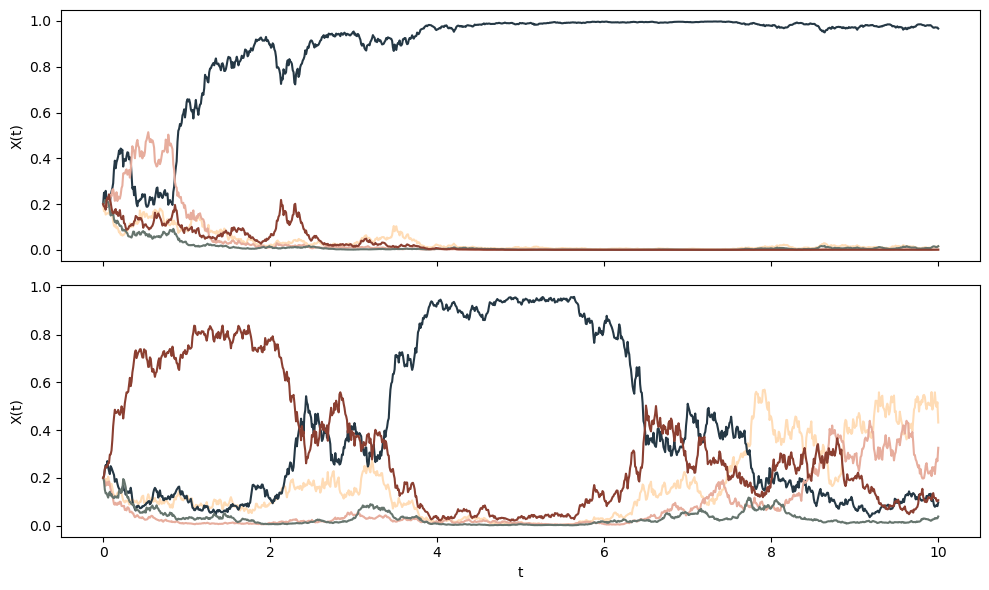

In [2]:
samples = 2
N = 5

res = p.gillespie_replicator(10,0.001,N=N,samples=samples,gap=10)

fig,ax = plt.subplots(samples,1,figsize=[10,6],sharex=True)
for i in range(samples):
    for j in range(N):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        if i: ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
plt.tight_layout()
plt.show()


## three populations with different noise terms and identical mean fitness

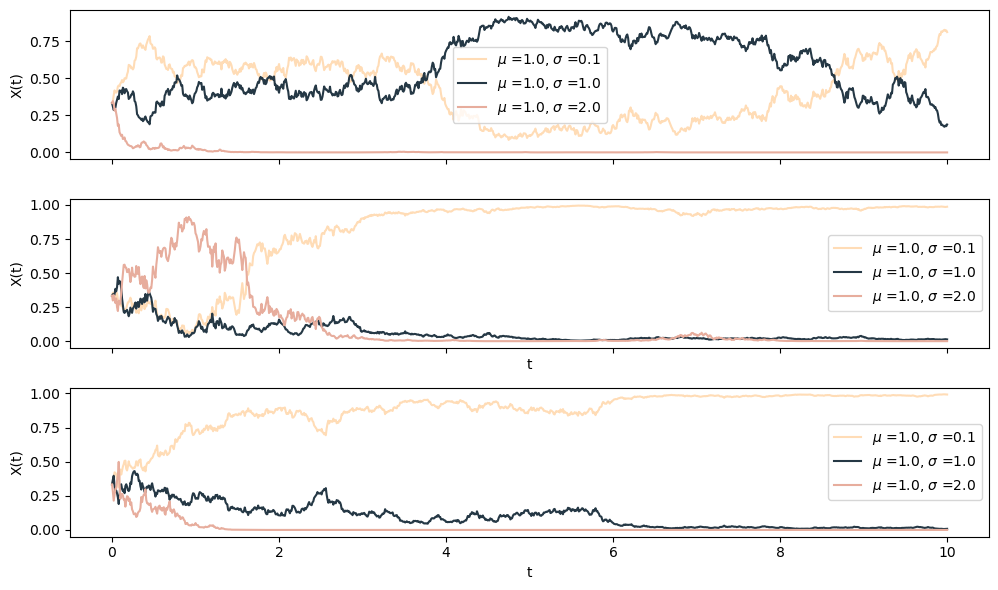

In [4]:
samples = 3
N = 3
sigma = np.array([0.1,1.0,2.0])

res = p.gillespie_replicator(10,0.001,N=N,sigma=sigma,samples=samples,gap=10)

leg=[r"$\mu$ ="+f'{x:.1f}'+r", $\sigma$ ="+f'{y:.1f}' for (x,y) in zip(res["mu"],res["sigma"])]

fig,ax = plt.subplots(samples,1,figsize=[10,6],sharex=True)
for i in range(samples):
    for j in range(N):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        if i: ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
        ax[i].legend(leg)
fig.tight_layout()
plt.show()


## two populations, many realizations

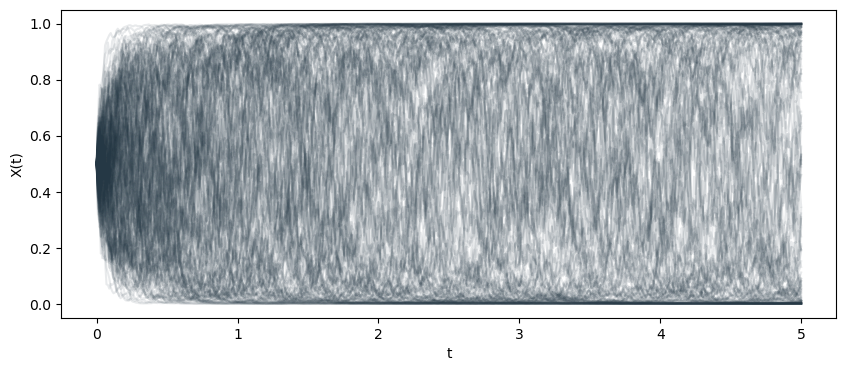

In [5]:
T = 5
samples = 200
N = 2
sigma = 2

res = p.gillespie_replicator(T,0.001,N=N,sigma=sigma,samples=samples,gap=10)

fig,ax = plt.subplots(1,1,figsize=[10,4])
for i in range(samples):
    ax.plot(res["t"],np.squeeze(res["X"][i][0]),color="C1",alpha=0.1)
    ax.set_xlabel("t")
    ax.set_ylabel("X(t)")

plt.show()


## here's an example with non-trivial covariance

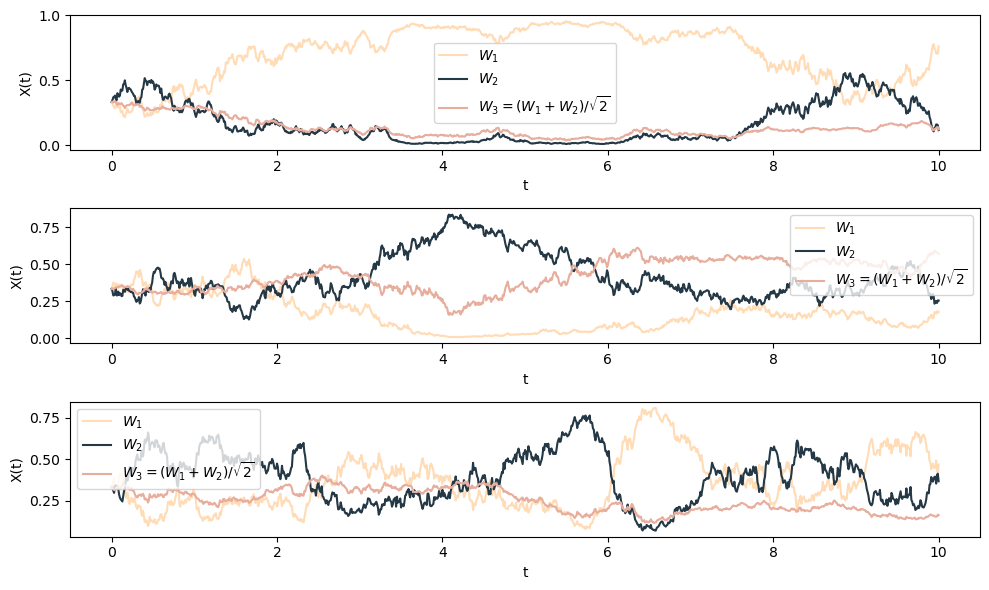

In [6]:
a = 1.0/np.sqrt(2)
cov = np.array([[1,0,a],[0,1,a],[a,a,1]])

samples = 3
N = 3


res = p.gillespie_replicator(10,0.001,N=N,covariance=cov,samples=samples,gap=10)

leg=[r"$W_1$",r"$W_2$",r"$W_3=(W_1+W_2)/\sqrt{2}$"]

fig,ax = plt.subplots(samples,1,figsize=[10,6])
for i in range(samples):
    for j in range(N):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
        ax[i].legend(leg)
fig.tight_layout()
plt.show()
